In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)

In [3]:
def get_coin(p):
    return random() > p

In [4]:
get_coin(0.5)

True

In [5]:
comb(10, 3) # 10 combination 3

120.0

In [7]:
def get_binom(m, n, p):
    return comb(m, n) * ( p ** n ) * (1-p) **(m-n)

# 0과 1 두 가지 중 True가 몇 번 나오는가?

10번 동전을 던졌을 때의 이항분포

In [11]:
m = 10 # try 
p = 0.2

result = [get_binom(m, n, p) for n in range(0, m+1)]
result, sum(result)

([0.10737418240000006,
  0.2684354560000001,
  0.3019898880000002,
  0.2013265920000001,
  0.08808038400000005,
  0.02642411520000001,
  0.005505024000000003,
  0.0007864320000000004,
  7.372800000000005e-05,
  4.096000000000002e-06,
  1.0240000000000006e-07],
 1.0000000000000004)

<BarContainer object of 11 artists>

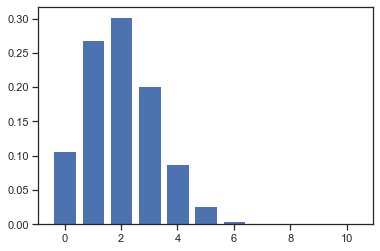

In [12]:
plt.bar(range(m+1), result)
# 이산확률분포

In [13]:
np.arange(0.1, 1, 0.1).tolist()

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]

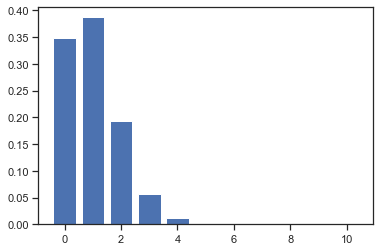

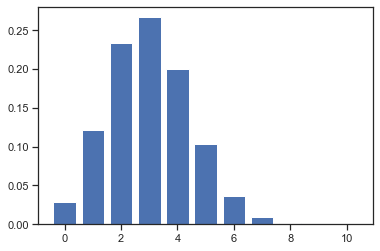

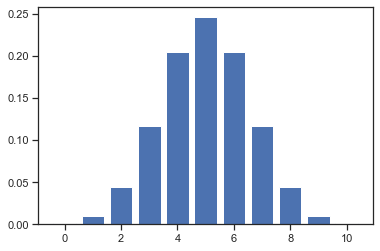

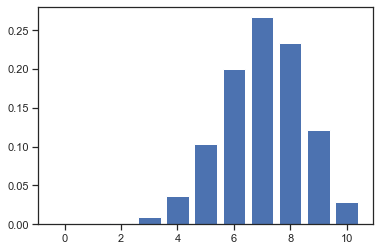

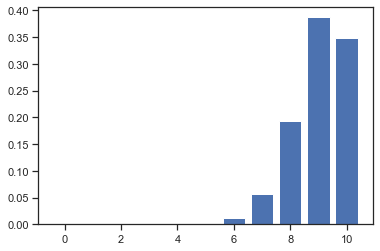

In [19]:
m = 10
result = list()

# 확률값이 올라가면서 보이는 그래프의 변화
# 0.5일 때는 종모양의 정규분포를 그림
# 0.5는 10번 던졌을 때 5번 나오는 확률이 젤 많다는 것
for p in np.arange(0.1, 1, 0.2).tolist():
    for n in range(0, m+1):
        result.append(get_binom(m, n, p))
    plt.bar(range(m+1), result)
    plt.show()
    result = list()

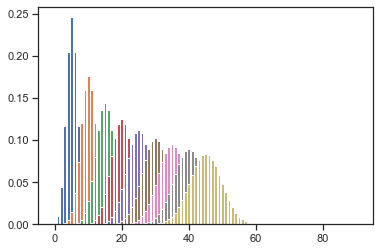

In [17]:
p = 0.5
result = list()

# 횟수의 증가
# 그래프 모양이 점차 단순한 종모양으로 변하는 걸 볼 수 있음
for m in np.arange(10, 100, 10).tolist():
    for n in range(0, m+1):
        result.append(get_binom(m, n, p))
        
    plt.bar(range(m+1), result)
    result = list()

In [21]:
# Probability Mass Function -> PMF
get_binom(m=10, n=3, p=0.5), sp.stats.binom.pmf(k=3, n=10, p=0.5)

(0.1171875, 0.11718750000000014)

In [22]:
from collections import Counter

In [30]:
binomial = sp.stats.binom(n=10, p=0.2) # 10번 실행, 확률 0.2

rvs_binomial = binomial.rvs(size=1000000) # rvs 랜덤 샘플 제작
np.unique(rvs_binomial), Counter(rvs_binomial)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 Counter({3: 201604,
          1: 268691,
          2: 301428,
          0: 107157,
          4: 88162,
          5: 26596,
          7: 737,
          6: 5545,
          8: 74,
          9: 6}))

<BarContainer object of 10 artists>

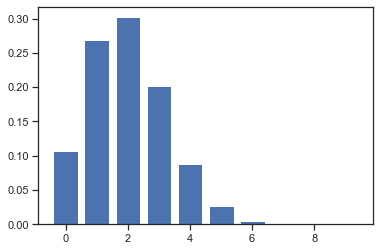

In [24]:
m = np.arange(0, 10, 1) # 0부터 10까지 늘려가면서 pmf를 구함
pmf_binomial = binomial.pmf(k=m) # 이항분포를 만들어 줄 수 있음
plt.bar(m, pmf_binomial)